# F20DL Coursework Group 8 2023-24

### Group 8 Members:
- Madihah Anaum
- Tanisha Kasar
- Sneha Sunny
- Dhruv Raghu
- Moses Varghese

# Part 4. Neural Networks and Convolutional Neural Networks

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
# read the coursework data set
X_train = pd.read_csv("data/Traffic_Sign/CompleteDataSet/x_train_all.csv")
y_train = pd.read_csv("data/Traffic_Sign/CompleteDataSet/y_train_all.csv")

X_test = pd.read_csv("data/Traffic_Sign/CompleteDataSet/x_test_all.csv")
y_test = pd.read_csv("data/Traffic_Sign/CompleteDataSet/y_test_all.csv")

## Linear Regression

Linear Regression is a machine learning techinque used for predictions. It models the relationship between a dependant variable and one or more independant variables by fitting a linear equation to observed data.

Linear Regression is **not** used for classification.

MSE - Mean Squared Error quantifies the difference between the observed(actual) values and the values predicted by the model.
A lower MSE indicates a model that is more accurate in its predictions.


In [5]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

# Creating linear regression object
model_test = LinearRegression()

# Training the model using the training sets
model_test.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_lr = model_test.predict(X_train)

# Calculate MSE
print("Mean squared error (train set): %.2f" % mean_squared_error(y_train, y_pred_train_lr))

Mean squared error (train set): 0.85


In [6]:
# create a table to compare the actual vs predicted values
df = pd.DataFrame({'Actual': y_train.values.flatten(), 'Predicted': y_pred_train_lr.flatten()})
df

,Actual,Predicted
0,0,0.637303
1,0,1.644844
2,0,0.907571
3,0,0.768075
4,0,0.337789
...,...,...
9685,9,7.984978
9686,9,8.784917
9687,9,8.764737
9688,9,8.869515


In [7]:
# Make predictions on the training set
y_pred_lr = model_test.predict(X_test)

# Calculating the MSE
mse_test = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error (test set): {mse_test}")

Mean Squared Error (test set): 3.15552968453579


In [9]:
# create a table to compare the actual vs predicted values
df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_lr.flatten()})
df

,Actual,Predicted
0,1,2.435302
1,4,2.816694
2,6,7.273353
3,7,7.113599
4,4,3.412110
...,...,...
3085,1,1.424491
3086,3,3.702341
3087,3,3.125931
3088,1,-1.033039


A higher MSE value on the test dataset indicates that the model didn't perform as well on unseen data as it did on the training data. This could be due to potential overfitting.

**Linear Separability** is used often for classification tasks, and not regression tasks. It refers to the ability to separate classes in a dataset using a linear boundary.


## Linear Classifiers

Linear classifiers are algorithms used in machine learning for classification tasks. Datapoints are separated using a linear decision boundary based on the linear combination of input features.

The general formula of the equation used by linear classifiers is w1x1 + w2x2 + ... + wnxn + b = 0, where x1,x2,x3,...,xn are input features and w1,w2,...,wn are weights assigned to each feature, and b is the bias term.



#### Metrics for Performance Evaluation

1. Accuracy - The proportion of correctly predicted observations to the total observations.

2. Precision - Ratio of correctly predicted positive observations to the total predicted positives.

3. Recall(Sensitivity) - Ratio of correctly predicted positive observations to all observations in the actual class.

4. F1 score - Weighted average of Precision and Recall.

5. AUC Score - Area under the ROC(Reciever Operating Characterstic) curve is a graph showing the performance of a classification model at all classification thresholds.

### Types of Linear Classifiers

##### 1. Logistic Regression

Logistic Regression, although called regression, is used for binary classification tasks. It is used to estimate the probability of a binary outcome based on one or more independant variables.

It's referred to as regression because it takes the output of linear regression as input and uses a sigmoid function (logistic function) to estimate the probability for the given class.

MSE is a metric typically used for regression models where the output is continuous. Logistic Regression usually deals with binary classification and so, using MSE can be misleading.


As we are dealing with a multi-class classification task, we use various ways to customize Logistic Regression for this purpose.

### Logistics Regression on Training Dataset

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


# Logistic Regression using multinomial classification.
classifier = LogisticRegression(multi_class='multinomial', solver = 'sag')

# Fitting the model
classifier.fit(X_train, y_train.values.ravel())

# Predicting the values
y_pred_train_logr = classifier.predict(X_train)

# Calculating the accuracy
print("Accuracy: ", accuracy_score(y_train, y_pred_train_logr))
# Calculating the confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_train, y_pred_train_logr))
# Calculating the classification report
print("Classification Report: \n", classification_report(y_train, y_pred_train_logr))

Accuracy:  0.9717234262125903
Confusion Matrix: 
 [[ 191   16    1    0    2    0    0    0    0    0]
 [   2 2139   55    4   16    0    2    0    2    0]
 [   0   36 2187    3   22    1    1    0    0    0]
 [   2   16   12 1373    2    1    3    0    0    1]
 [   0   11   24    1 1944    0    0    0    0    0]
 [   0    0    2    0    2  205    0    0    0    1]
 [   0    3    6    2    5    0  342    0    0    2]
 [   0    0    0    0    1    0    0  238    1    0]
 [   0    0    1    0    2    2    1    1  533    0]
 [   0    0    2    2    1    0    1    0    0  264]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94       210
           1       0.96      0.96      0.96      2220
           2       0.96      0.97      0.96      2250
           3       0.99      0.97      0.98      1410
           4       0.97      0.98      0.98      1980
           5       0.98      0.98      0.98       210
           6   

In [11]:
y_pred_logr = classifier.predict(X_test)

# Calculating the accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred_logr))
# Calculating the confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_logr))
# Calculating the classification report
print("Classification Report: \n", classification_report(y_test, y_pred_logr))

Accuracy:  0.8851132686084142
Confusion Matrix: 
 [[ 18  19   1   3  19   0   0   0   0   0]
 [  1 651  40   7  17   0   3   0   1   0]
 [  2  28 698   6  16   0   0   0   0   0]
 [  1   9   2 425   8   0   3   2   0   0]
 [  3  36  16   4 594   0   7   0   0   0]
 [  0   0   1   0   0  48   0   0   0  11]
 [  0   7   0   2   1   0  80   0   0   0]
 [  0  30   0   0   0   0   0  30   0   0]
 [  1   1   2   5   0   2  20   0 102  17]
 [  0   0   0   1   0   0   0   0   0  89]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.30      0.42        60
           1       0.83      0.90      0.87       720
           2       0.92      0.93      0.92       750
           3       0.94      0.94      0.94       450
           4       0.91      0.90      0.90       660
           5       0.96      0.80      0.87        60
           6       0.71      0.89      0.79        90
           7       0.94      0.50      0.65        60
       

### 10-Fold Cross-Validation 

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_accuracy = cross_val_score(classifier, X_train, y_train, cv=10) 

# Printing the accuracies obtained for every fold
for i, acc in enumerate(cross_val_accuracy):
    print("Cross validation fold {} accuracy = {}".format(i, acc))
        
# Calculating the mean of cross validation accuracy
print("Mean of cross validation accuracy: ", cross_val_accuracy.mean())

Cross validation fold 0 accuracy = 0.8183694530443757
Cross validation fold 1 accuracy = 0.9040247678018576
Cross validation fold 2 accuracy = 0.9019607843137255
Cross validation fold 3 accuracy = 0.8968008255933952
Cross validation fold 4 accuracy = 0.8844169246646026
Cross validation fold 5 accuracy = 0.9050567595459237
Cross validation fold 6 accuracy = 0.8596491228070176
Cross validation fold 7 accuracy = 0.8957688338493293
Cross validation fold 8 accuracy = 0.891640866873065
Cross validation fold 9 accuracy = 0.9236326109391125
Mean of cross validation accuracy:  0.8881320949432403


In [13]:
from sklearn.model_selection import StratifiedKFold

# Stratified K fold cross validation object
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

accuracy_scores = []

# Loop over each fold
for train_index, test_index in skf.split(X_train, y_train):
    # Split data
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Train model
    classifier.fit(X_train_fold, y_train_fold.values.ravel())  
    # Test model
    pred = classifier.predict(X_test_fold)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_fold, pred)
    accuracy_scores.append(accuracy)
    
# Print accuracy
print("Accuracy scores: ", accuracy_scores)
# Calculate mean accuracy
print("Mean accuracy: ", np.mean(accuracy_scores))


Accuracy scores:  [0.9391124871001032, 0.9484004127966976, 0.9463364293085655, 0.9339525283797729, 0.9380804953560371, 0.9494324045407637, 0.9411764705882353, 0.9339525283797729, 0.9463364293085655, 0.9473684210526315]
Mean accuracy:  0.9424148606811146


### Linear Separability

The high accuracy and strong performance metrics such as precision, recall, and F1-score for most classes suggest that most of the dataset is linearly separable.

Certain classes have lower performance metrics which suggest that these classes are not as easily linearly separable as the others. This could be due to overlap in features.

## Other Linear Classifiers

In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver = 'sag'),
    'SGD Classifier': SGDClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Linear SVM': SVC(kernel='linear')
}

# List to store individual DataFrames
results_list = []

# Train each classifier and evaluate
for name, clf in classifiers.items():
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Create a DataFrame for the current classifier's results
    df = pd.DataFrame({
        'Classifier': [name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    })
    
    # Add the DataFrame to the list
    results_list.append(df)

# Concatenate all DataFrames in the list
results = pd.concat(results_list, ignore_index=True)


# Display results in a table format
print(results.to_string(index=False))


                  Classifier  Accuracy  Precision   Recall  F1 Score
         Logistic Regression  0.885761   0.889035 0.885761  0.882059
              SGD Classifier  0.850809   0.871079 0.850809  0.847427
Linear Discriminant Analysis  0.833657   0.843501 0.833657  0.831461
                  Linear SVM  0.854045   0.857906 0.854045  0.852833


## One-vs-All Datasets

### Logistic Regression on One-vs-All Dataset

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Initialize a list to store the models and performance metrics for easy comparison
models = []
performance = []


for i in range(10):
    # Initialize the model
    y_train_i = pd.read_csv('datasets/y_train_'+str(i)+'.csv')
    y_test_i = pd.read_csv('datasets/y_test_'+str(i)+'.csv')
    
    # Create logistic regression object
    reg_ovr = LogisticRegression()
    reg_ovr.fit(X_train, y_train_i.values.ravel())
    
    # Predict the values
    y_pred_i = reg_ovr.predict(X_test)
    
    # Store the model
    models.append(reg_ovr)
    
    # Store the performance of the model
    accuracy = accuracy_score(y_test_i, y_pred_i)
    precision = precision_score(y_test_i, y_pred_i, average='macro')
    recall = recall_score(y_test_i, y_pred_i, average='macro')
    f1 = f1_score(y_test_i, y_pred_i, average='macro')
    
    performance.append({
        'Class': i,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 score': f1
    })
    
performance_df = pd.DataFrame(performance)
print(performance_df)
    


   Class  Accuracy  Precision    Recall  F1 score
0      0  0.977346   0.705485  0.718894  0.711963
1      1  0.912298   0.874023  0.884327  0.878998
2      2  0.920065   0.884834  0.904641  0.894057
3      3  0.984142   0.964609  0.972285  0.968399
4      4  0.953398   0.930640  0.930640  0.930640
5      5  0.986408   0.839312  0.772525  0.802097
6      6  0.982201   0.821342  0.920778  0.863815
7      7  0.987055   0.870082  0.748350  0.796711
8      8  0.979935   0.952496  0.818639  0.872722
9      9  0.986731   0.848919  0.971611  0.900320


Evaluating each model's performance tells us how well they can individually distinguish their respective classes.
The model generalizes reasonably well, but there is room for improvement for certain classes.




### Linear SVM on One-vs-All Dataset

In [18]:
# Initialize a list to store the models and performance metrics for easy comparison
models_svg = []
performance_svg = []


for i in range(10):
    # Initialize the model
    y_train_i = pd.read_csv('datasets/y_train_'+str(i)+'.csv')
    y_test_i = pd.read_csv('datasets/y_test_'+str(i)+'.csv')
    
    # Create support vector classifier object
    svc_ovr = SVC(kernel='linear', random_state=42)
    
    # Fit the model
    svc_ovr.fit(X_train, y_train_i.values.ravel())
    
    # Predict the values
    y_pred_i = svc_ovr.predict(X_test)
    
    # Store the model
    models.append(svc_ovr)
    
    # Store the performance of the model
    accuracy = accuracy_score(y_test_i, y_pred_i)
    precision = precision_score(y_test_i, y_pred_i, average='macro')
    recall = recall_score(y_test_i, y_pred_i, average='macro')
    f1 = f1_score(y_test_i, y_pred_i, average='macro')
    
    performance_svg.append({
        'Class': i,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 score': f1
    })
    
performanceSVG_df = pd.DataFrame(performance_svg)
print(performanceSVG_df)

performanceSVG_df = pd.DataFrame(performance_svg)
average_accuracy = performanceSVG_df['Accuracy'].mean()
print("Average Accuracy for each model:", average_accuracy)


   Class  Accuracy  Precision    Recall  F1 score
0      0  0.977670   0.716465  0.776238  0.742466
1      1  0.877346   0.823524  0.850422  0.835463
2      2  0.890291   0.843546  0.877282  0.858030
3      3  0.957929   0.896826  0.950492  0.920911
4      4  0.924595   0.877327  0.911775  0.892792
5      5  0.985437   0.816474  0.780198  0.797176
6      6  0.970550   0.745983  0.909389  0.805093
7      7  0.987702   0.889822  0.748680  0.802998
8      8  0.982201   0.917601  0.883095  0.899515
9      9  0.988997   0.868139  0.978167  0.915423
Average Accuracy for each model: 0.9542718446601942


##

In [11]:
import tensorflow as tf
from tensorflow import keras

2023-11-28 12:16:10.372313: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 12:16:10.421465: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 12:16:10.422639: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-28 12:16:11.278149: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [12]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

## Multilayer Perceptron with Varying Parameters

Run the Multilayer Perceptron, experiment with various Neural Network parameters: modify
the activation functions, experiment with the number and size of its layers, vary the learning rate, epochs
and momentum, and validation threshold. Analyze relative performance of the resulting Neural
Networks and changing parameters, using the training and the test data. What techniques can be used
for performing hyperparameter tuning in a systematic way? Report on the best combination of
parameters obtained for your experiments.

In [15]:
# Loading the dataset 
X_train = pd.read_csv('datasets/x_train_all.csv')
y_train = pd.read_csv('datasets/y_train_all.csv')
X_test = pd.read_csv('datasets/x_test_all.csv')
y_test = pd.read_csv('datasets/y_test_all.csv')

In [16]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9690, 2304), (9690, 1), (3090, 2304), (3090, 1))

In [28]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [29]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
y_train = to_categorical(label_encoder.fit_transform(y_train.ravel()), 10)
y_test = to_categorical(label_encoder.transform(y_test.ravel()), 10)

### Run MLP

In [20]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(units=300, activation='relu', input_shape=(2304,)))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [44]:
from keras.optimizers import SGD

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.layers

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               691500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 722,610
Trainable params: 722,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
hidden1 = model.layers[1]
hidden1.name

'dense_1'

In [36]:
model.get_layer(hidden1.name) is hidden1

True

In [37]:
weights, biases = hidden1.get_weights()

In [38]:
weights.shape

(300, 100)

In [39]:
biases.shape

(100,)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
243/243 [==============================] - 2s 7ms/step - loss: 0.1693 - accuracy: 0.9467 - val_loss: 0.2637 - val_accuracy: 0.9190
Epoch 2/10
243/243 [==============================] - 2s 7ms/step - loss: 0.1625 - accuracy: 0.9492 - val_loss: 0.3621 - val_accuracy: 0.8803
Epoch 3/10
243/243 [==============================] - 2s 7ms/step - loss: 0.1537 - accuracy: 0.9515 - val_loss: 0.1810 - val_accuracy: 0.9474
Epoch 4/10
243/243 [==============================] - 2s 7ms/step - loss: 0.1470 - accuracy: 0.9519 - val_loss: 0.3299 - val_accuracy: 0.8808
Epoch 5/10
243/243 [==============================] - 2s 7ms/step - loss: 0.1331 - accuracy: 0.9587 - val_loss: 0.2080 - val_accuracy: 0.9376
Epoch 6/10
243/243 [==============================] - 2s 7ms/step - loss: 0.1241 - accuracy: 0.9578 - val_loss: 0.2593 - val_accuracy: 0.9159
Epoch 7/10
243/243 [==============================] - 2s 7ms/step - loss: 0.1555 - accuracy: 0.9502 - val_loss: 0.3776 - val_accuracy: 0.9097
Epoch 

In [ ]:
# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8601941466331482


### Hyperparameter Tuning

In [ ]:
from keras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def create_model(units1=300, units2=100, units3=100, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(units=units1, activation=activation, input_shape=(2304,)))
    model.add(Dense(units=units2, activation=activation))
    model.add(Dense(units=units3, activation=activation))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0, validation_split=0.1)  # Using 10% of data as validation

# Define the hyperparameters grid to be searched
param_dist = {
    'units1': [50, 100, 150, 200],
    'units2': [50, 100, 150, 200],
    'units3': [50, 100, 150, 200],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'sgd'],
    'epochs': [30, 40, 50, 60]
}

random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_dist, 
    n_iter=10, 
    cv=3, 
    n_jobs=1,
    error_score='raise'
)

try:
    random_search_results = random_search.fit(X_train, y_train)
    print("Best: %f using %s" % (random_search_results.best_score_, random_search_results.best_params_))
except Exception as e:
    print("An error occurred:", e)

/var/folders/99/gh5ptf_x45j_0k68p20_md2c0000gn/T/ipykernel_29014/401243501.py:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0, validation_split=0.1)  # Using 10% of data as validation


Best: 0.951496 using {'units3': 50, 'units2': 50, 'units1': 200, 'optimizer': 'sgd', 'epochs': 50, 'activation': 'tanh'}


In [ ]:
model = Sequential()
# model.add(Dense(units=150, activation='relu', input_shape=(2304,)))
model.add(Dense(units=200, activation='tanh', input_shape=(2304,)))
model.add(Dense(units=50, activation='tanh'))
model.add(Dense(units=50, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=75, validation_split=0.2)

Epoch 1/75
243/243 [==============================] - 2s 5ms/step - loss: 1.5499 - accuracy: 0.4128 - val_loss: 1.2221 - val_accuracy: 0.5134
Epoch 2/75
243/243 [==============================] - 1s 4ms/step - loss: 1.0172 - accuracy: 0.6275 - val_loss: 0.7560 - val_accuracy: 0.7492
Epoch 3/75
243/243 [==============================] - 1s 3ms/step - loss: 0.7213 - accuracy: 0.7503 - val_loss: 0.6422 - val_accuracy: 0.7632
Epoch 4/75
243/243 [==============================] - 1s 4ms/step - loss: 0.5758 - accuracy: 0.8082 - val_loss: 0.7488 - val_accuracy: 0.7214
Epoch 5/75
243/243 [==============================] - 1s 3ms/step - loss: 0.5070 - accuracy: 0.8323 - val_loss: 0.5169 - val_accuracy: 0.8199
Epoch 6/75
243/243 [==============================] - 1s 3ms/step - loss: 0.3863 - accuracy: 0.8727 - val_loss: 0.3904 - val_accuracy: 0.8782
Epoch 7/75
243/243 [==============================] - 1s 3ms/step - loss: 0.3683 - accuracy: 0.8771 - val_loss: 0.4835 - val_accuracy: 0.8390
Epoch 

In [ ]:
# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9074433445930481


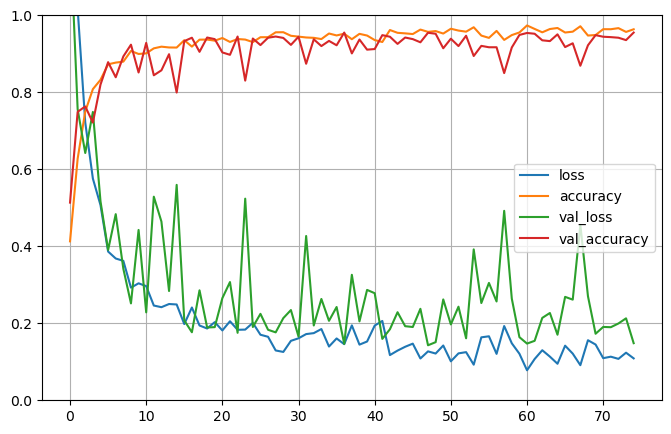

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

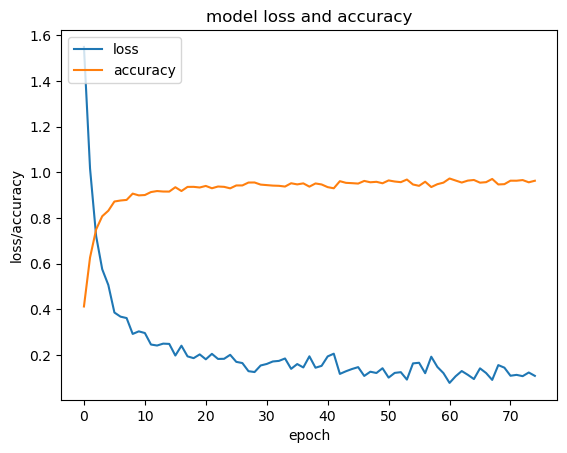

In [ ]:
# plot just loss and accuracy from history
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss and accuracy')
plt.ylabel('loss/accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

### Overfitting Experiment

Use the tuned MLP

In [46]:
model_MLP = Sequential()
model_MLP.add(Dense(units=300, activation='relu', input_shape=(2304,)))
model_MLP.add(Dense(units=100, activation='relu'))
model_MLP.add(Dense(units=10, activation='softmax'))
model_MLP.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

#### 30% Boost

In [31]:
# remove 30% of instance from X_train and y_train
from sklearn.model_selection import train_test_split

X_train_30, X_test_add, y_train_30, y_test_add = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

X_test_30 = X_test.copy()
y_test_30 = y_test
# Add X_test_add and y_test_add to X_test and y_test
X_test_30 = np.concatenate((X_test_30, X_test_add), axis=0)
y_test_30 = np.concatenate((y_test_30, y_test_add), axis=0)

print('New X_train:', X_train_30.shape)
print('New X_test:', X_test_30.shape)

New X_train: (6783, 2304)
New X_test: (5997, 2304)


In [50]:
history = model_MLP.fit(X_train_30, y_train_30, epochs=75, validation_split=0.2)

Epoch 1/75
170/170 [==============================] - 1s 6ms/step - loss: 1.5346 - accuracy: 0.4029 - val_loss: 1.5366 - val_accuracy: 0.3869
Epoch 2/75
170/170 [==============================] - 1s 6ms/step - loss: 1.5220 - accuracy: 0.4110 - val_loss: 1.4749 - val_accuracy: 0.4296
Epoch 3/75
170/170 [==============================] - 1s 6ms/step - loss: 1.5037 - accuracy: 0.4222 - val_loss: 1.5046 - val_accuracy: 0.3891
Epoch 4/75
170/170 [==============================] - 1s 6ms/step - loss: 1.5093 - accuracy: 0.4128 - val_loss: 1.6082 - val_accuracy: 0.3736
Epoch 5/75
170/170 [==============================] - 1s 6ms/step - loss: 1.4996 - accuracy: 0.4185 - val_loss: 1.4794 - val_accuracy: 0.3957
Epoch 6/75
170/170 [==============================] - 1s 6ms/step - loss: 1.5043 - accuracy: 0.4139 - val_loss: 1.4527 - val_accuracy: 0.4186
Epoch 7/75
170/170 [==============================] - 1s 6ms/step - loss: 1.4991 - accuracy: 0.4167 - val_loss: 1.4847 - val_accuracy: 0.3972
Epoch 

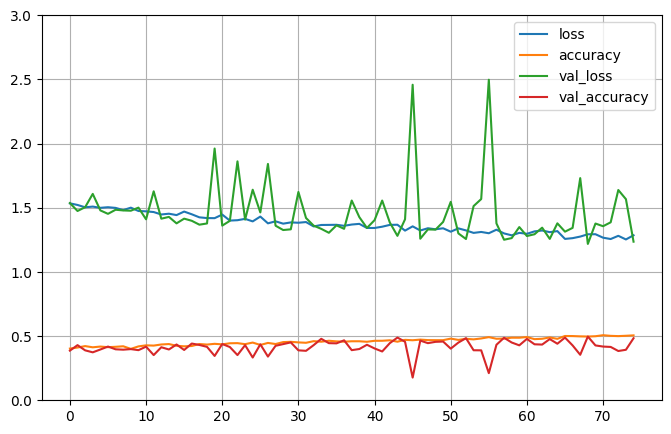

In [52]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3)
plt.show()

In [53]:
# evaluate model on the testing set
model_MLP.evaluate(X_test_30, y_test_30)

188/188 [==============================] - 1s 3ms/step - loss: 1.3659 - accuracy: 0.4606


[1.3659130334854126, 0.46056362986564636]

As seen from the plot, accuracy has taken a nose dive and loss has leaped into the stars

#### 60% Boost

In [54]:
# remove 60% of instance from X_train and y_train
from sklearn.model_selection import train_test_split

X_train_60, X_test_add, y_train_60, y_test_add = train_test_split(X_train, y_train, test_size=0.6, random_state=42, stratify=y_train)

X_test_60 = X_test.copy()
y_test_60 = y_test
# Add X_test_add and y_test_add to X_test and y_test
X_test_60 = np.concatenate((X_test_60, X_test_add), axis=0)
y_test_60 = np.concatenate((y_test_60, y_test_add), axis=0)

print('New X_train:', X_train_60.shape)
print('New X_test:', X_test_60.shape)

New X_train: (3876, 2304)
New X_test: (8904, 2304)


In [59]:
history = model_MLP.fit(X_train_60, y_train_60, epochs=60, validation_split=0.2)

Epoch 1/60
 1/97 [..............................] - ETA: 0s - loss: 1.3355 - accuracy: 0.4688

97/97 [==============================] - 1s 8ms/step - loss: 1.2071 - accuracy: 0.5310 - val_loss: 1.3038 - val_accuracy: 0.4871
Epoch 2/60
97/97 [==============================] - 1s 6ms/step - loss: 1.1984 - accuracy: 0.5271 - val_loss: 1.4889 - val_accuracy: 0.3737
Epoch 3/60
97/97 [==============================] - 1s 6ms/step - loss: 1.2268 - accuracy: 0.5245 - val_loss: 1.4884 - val_accuracy: 0.3956
Epoch 4/60
97/97 [==============================] - 1s 6ms/step - loss: 1.2244 - accuracy: 0.5229 - val_loss: 1.1199 - val_accuracy: 0.5709
Epoch 5/60
97/97 [==============================] - 1s 6ms/step - loss: 1.2130 - accuracy: 0.5265 - val_loss: 1.3012 - val_accuracy: 0.4291
Epoch 6/60
97/97 [==============================] - 1s 6ms/step - loss: 1.1770 - accuracy: 0.5387 - val_loss: 1.2732 - val_accuracy: 0.4742
Epoch 7/60
97/97 [==============================] - 1s 6ms/step - loss: 1.2000 - accuracy: 0.5410 - val_loss: 1.1462 - val_accuracy: 0.5490
Epoch 8/60
97/97 [=============

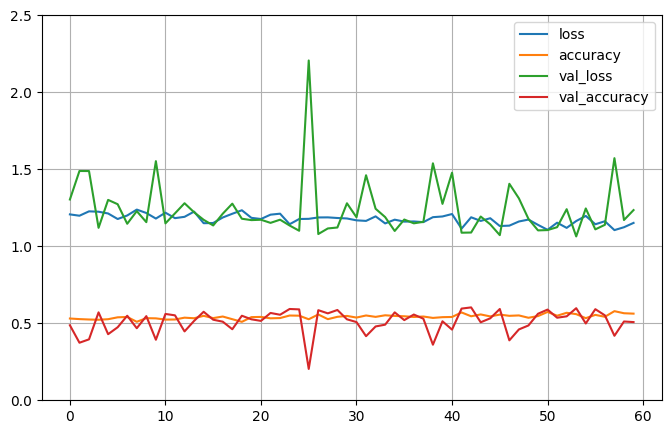

In [62]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
plt.show()

In [61]:
# evaluate model on the testing set
model_MLP.evaluate(X_test_60, y_test_60)

279/279 [==============================] - 1s 2ms/step - loss: 1.3872 - accuracy: 0.4651


[1.387224555015564, 0.4650718867778778]

### Ways to Stop NNs from Overfitting

Ensure there is sufficient train data in relation to test data.

When there's more test data than train data, this is the first sign of trouble indicating the data has not been split properly.

## Discussion

Based on all of these experiments, what conclusions can you make about the data set complexity
(linear separability), and the capacity of deep neural networks to generalize to new data? Can you make
any conclusions about the effect of activation functions?

## Convolutional Neural Networks

For top marks, repeat these experiments using Convolutional Neural networks. For these types
of networks, you can additionally vary the kinds of layers (convolutional, pooling, fully connected).

In [4]:
# reshape dataset
X_train_array = X_train.to_numpy()
X_train_reshaped = X_train_array.reshape(-1, 48, 48)

X_test_array = X_test.to_numpy()
X_test_reshaped = X_test_array.reshape(-1, 48, 48)

In [5]:
X_train = X_train_reshaped / 255
X_test = X_test_reshaped / 255

In [18]:
class_names = [
    "speed limit 20", 
    "speed limit 30", 
    "speed limit 50", 
    "speed limit 60", 
    "speed limit 70", 
    "left turn", 
    "right turn", 
    "beware pedestrain crossing", 
    "beware children", 
    "beware cycle route ahead"
    ]

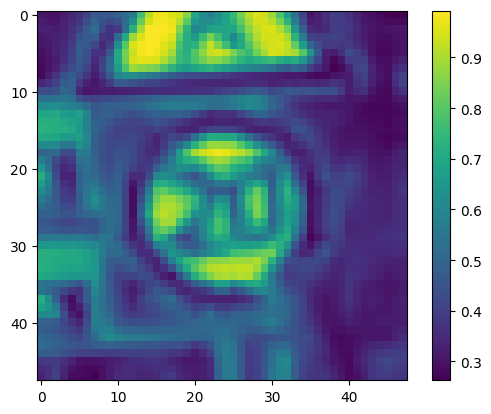

In [8]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

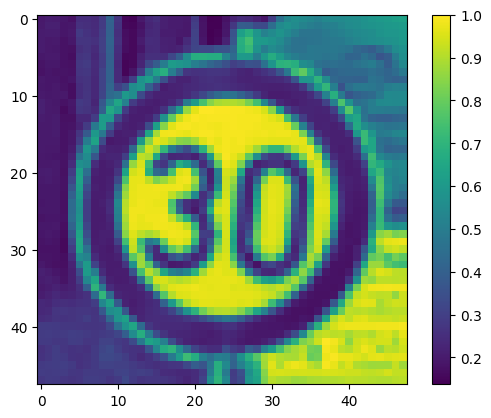

In [9]:
plt.imshow(X_train[2000])
plt.colorbar()
plt.grid(False)

In [13]:
# let's build an ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(48, 48)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=X_train,y=y_train,epochs=10)

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)

Epoch 1/10


2023-11-28 12:16:22.757729: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89303040 exceeds 10% of free system memory.


303/303 [==============================] - 2s 5ms/step - loss: 1.5348 - accuracy: 0.4638
Epoch 2/10
303/303 [==============================] - 1s 5ms/step - loss: 1.0004 - accuracy: 0.7002
Epoch 3/10
303/303 [==============================] - 1s 5ms/step - loss: 0.7355 - accuracy: 0.7972
Epoch 4/10
303/303 [==============================] - 2s 5ms/step - loss: 0.5793 - accuracy: 0.8360
Epoch 5/10
303/303 [==============================] - 2s 5ms/step - loss: 0.4725 - accuracy: 0.8732
Epoch 6/10
303/303 [==============================] - 1s 5ms/step - loss: 0.4271 - accuracy: 0.8837
Epoch 7/10
303/303 [==============================] - 1s 5ms/step - loss: 0.3695 - accuracy: 0.8957
Epoch 8/10
303/303 [==============================] - 2s 5ms/step - loss: 0.3703 - accuracy: 0.8958
Epoch 9/10
303/303 [==============================] - 1s 5ms/step - loss: 0.3252 - accuracy: 0.9102
Epoch 10/10
303/303 [==============================] - 2s 5ms/step - loss: 0.2876 - accuracy: 0.9221


2023-11-28 12:16:38.471007: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28477440 exceeds 10% of free system memory.



Test accuracy: 0.8614886999130249


In [14]:
classifications = model.predict(X_test)

35/97 [=========>....................] - ETA: 0s

2023-11-28 12:16:41.545065: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28477440 exceeds 10% of free system memory.


97/97 [==============================] - 0s 2ms/step


In [15]:
print(classifications[3])

[3.8888059e-12 2.9708598e-08 5.8200358e-06 1.8466156e-09 4.2948965e-08
 2.0335427e-04 7.2032976e-04 9.9899507e-01 3.5755377e-07 7.5056822e-05]


In [16]:
np.argmax(classifications[3])

7

In [17]:
np.max(classifications[3])

0.99899507

In [19]:
class_names[np.argmax(classifications[3])]

'beware pedestrain crossing'

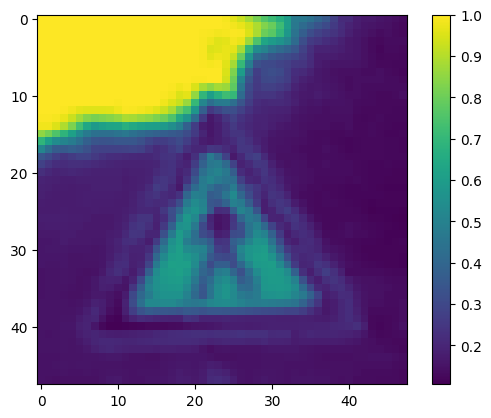

In [ ]:
plt.imshow(X_test[3])
plt.colorbar()
plt.grid(False)

In [9]:
# now let's run a CNN model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(48, 48, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [29]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
303/303 [==============================] - 28s 91ms/step - loss: 1.0436 - accuracy: 0.6364
Epoch 2/5
303/303 [==============================] - 29s 95ms/step - loss: 0.1455 - accuracy: 0.9578
Epoch 3/5
303/303 [==============================] - 28s 92ms/step - loss: 0.0860 - accuracy: 0.9743
Epoch 4/5
303/303 [==============================] - 28s 92ms/step - loss: 0.0426 - accuracy: 0.9893
Epoch 5/5
303/303 [==============================] - 28s 93ms/step - loss: 0.0426 - accuracy: 0.9874


In [30]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.93915855884552


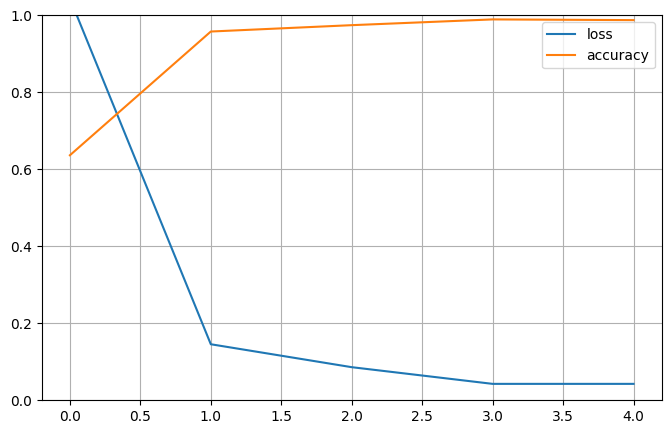

In [31]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

already, some insane improvements, you can see just from the reduction in the loss, amd that was only 5 epochs

### Hyperparameter Tuning

Rerun with tuned parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf

# Define a function to create the model
def create_model(optimizer='adam', kernel_size=(3, 3), dense_units=128, num_layers=2, activation='relu', layer_size=100, momentum=0.9):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(64, kernel_size, activation='relu', input_shape=(48, 48, 1)))
    model.add(tf.keras.layers.MaxPooling2D(2, 2))
    model.add(tf.keras.layers.Conv2D(64, kernel_size, activation='relu'))
    model.add(tf.keras.layers.Flatten())
    for _ in range(num_layers):
        model.add(tf.keras.layers.Dense(layer_size, activation=activation))
    model.add(tf.keras.layers.Dense(dense_units, activation=activation))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier from the model function
modelCNN = KerasClassifier(build_fn=create_model, verbose=0)


In [ ]:
# Define the grid of parameters to search
param_grid_CNN = {
    'optimizer': ['adam', 'rmsprop', 'sdg', 'adafactor'],
    'kernel_size': [(3, 3), (4, 4), (5, 5)],
    'dense_units': [64, 128, 256],
    'num_layers': [2, 3, 4],
    'activation': ['relu', 'sigmoid', 'tanh', 'LeakyReLU'],
    'layer_size': [50, 100, 200],
    'momentum': [0.85, 0.9, 0.95]
}

In [ ]:
def runGridSearch(model, param_grid, cv, verbose):
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, verbose=verbose)
    # Perform grid search
    grid_result = grid.fit(X_train, y_train)
    # Print best parameters and best accuracy
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
param_grid_CNN_activation = {
    'activation': ['relu', 'sigmoid', 'tanh', 'LeakyReLU'],
}

runGridSearch(model, param_grid_CNN_activation, 3, 1)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best: 0.546956 using {'activation': 'tanh'}


In [ ]:
param_grid_CNN_optimizer = {
    'optimizer': ['adam', 'rmsprop', 'sdg', 'adafactor'],
}

runGridSearch(model, param_grid_CNN_optimizer, 3, 1)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best: 0.479360 using {'optimizer': 'rmsprop'}


In [ ]:
param_grid_CNN_dense_units = {
    'dense_units': [64, 128, 256],
}

runGridSearch(model, param_grid_CNN_dense_units, 3, 1)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best: 0.409494 using {'dense_units': 128}


In [ ]:
param_grid_CNN_kernel_size = {
    'kernel_size': [(3, 3), (4, 4), (5, 5)],
}

runGridSearch(model, param_grid_CNN_kernel_size, 3, 1)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best: 0.503509 using {'kernel_size': (5, 5)}


In [ ]:
param_grid_CNN_num_layers = {
    'num_layers': [2, 3, 4],
}

runGridSearch(model, param_grid_CNN_num_layers, 3, 1)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best: 0.415273 using {'num_layers': 3}


In [ ]:
param_grid_CNN_momentum = {
    'momentum': [0.85, 0.9, 0.95]
}

runGridSearch(model, param_grid_CNN_momentum, 3, 1)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best: 0.446336 using {'momentum': 0.95}


In [ ]:
# rerun with tuned cnn
model_cnn = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(48, (5,5), activation='tanh', input_shape=(48, 48, 1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(48, (5,5), activation='tanh'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(48, (5,5), activation='tanh'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_cnn.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn.summary()

historycnn_tuned = model_cnn.fit(X_train, y_train, epochs=5)

test_loss, test_acc = model_cnn.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 44, 44, 48)        1248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 22, 48)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 18, 18, 48)        57648     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 9, 9, 48)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 5, 48)          57648     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 2, 2, 48)        

2023-11-27 23:09:48.341006: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89303040 exceeds 10% of free system memory.


303/303 [==============================] - 22s 72ms/step - loss: 0.4415 - accuracy: 0.8610
Epoch 2/5
303/303 [==============================] - 20s 67ms/step - loss: 0.0276 - accuracy: 0.9929
Epoch 3/5
303/303 [==============================] - 20s 66ms/step - loss: 0.0081 - accuracy: 0.9976
Epoch 4/5
303/303 [==============================] - 19s 64ms/step - loss: 0.0041 - accuracy: 0.9989
Epoch 5/5
303/303 [==============================] - 22s 73ms/step - loss: 3.3776e-04 - accuracy: 1.0000

Test accuracy: 0.991909384727478


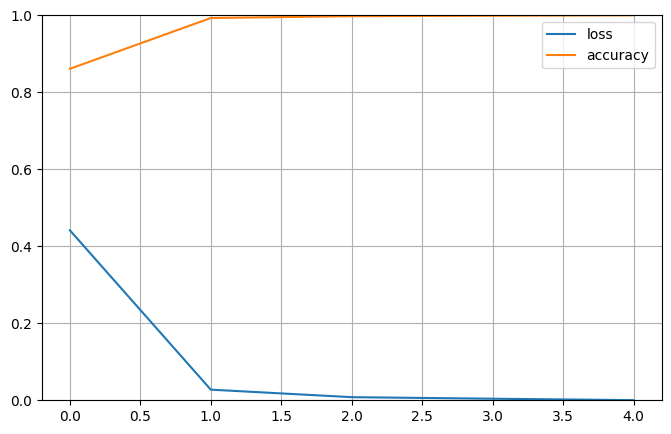

In [ ]:
pd.DataFrame(historycnn_tuned.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

As seen from the plotting, the accuracy went up to 99 from 93 which is a 6% improvement.

These results make sense given the ranges given for grid search. 3 layers and 128 dense units were in the middle of the provided range, and the higher momentum of 0.95 complements the RMSprop optimizer, since RMSprop is in a sense, an adaptive version of Stochastic Gradient Descent, preventing slow convergence and overshooting.

### Visualizing layers

1/1 [==============================] - 0s 17ms/step


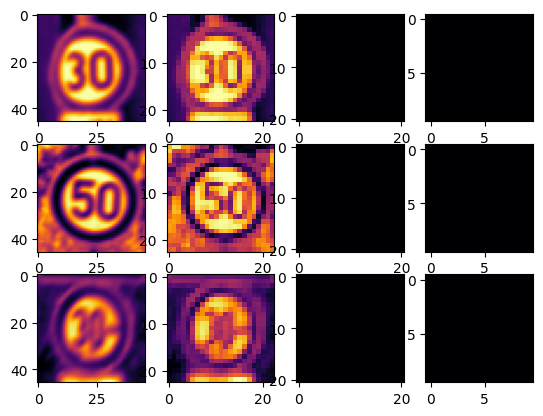

In [ ]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

# from tensorflow import keras
# from keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1, 48, 48, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(X_test[SECOND_IMAGE].reshape(1, 48, 48, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(X_test[THIRD_IMAGE].reshape(1, 48, 48, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

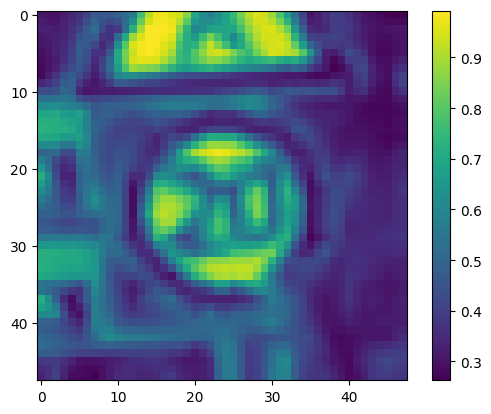

In [ ]:
plt.imshow(X_train[FIRST_IMAGE].reshape(48,48))
plt.colorbar()
plt.grid(False)

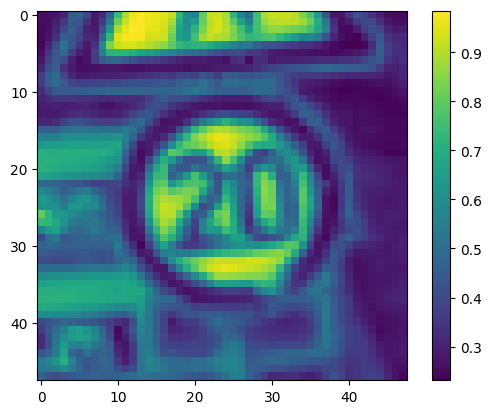

In [ ]:
plt.imshow(X_train[SECOND_IMAGE].reshape(48,48))
plt.colorbar()
plt.grid(False)

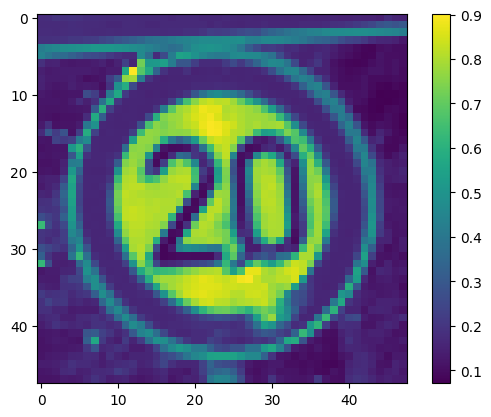

In [ ]:
plt.imshow(X_train[THIRD_IMAGE].reshape(48,48))
plt.colorbar()
plt.grid(False)